In [23]:
from test_beta_package import *
%matplotlib inline

In [44]:
# general check of the folder structure and assign variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [45]:
#load the pickle files and assign dictionary to variables
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


In [46]:
# obtain the information and save them for further processing
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)
print(f"the predicotrs are {predictors_name_list}")

the predicotrs are ['B Speeds', 'C Body_direction', 'D Allo_head_direction', 'G Neck_elevation', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth', 'N Back_pitch', 'O Back_azimuth', 'P Ego2_head_roll', 'Q Ego2_head_pitch', 'R Ego2_head_azimuth', 'B Speeds_1st_der', 'C Body_direction_1st_der', 'C Body_direction_2nd_der', 'D Allo_head_direction_1st_der', 'D Allo_head_direction_2nd_der', 'G Neck_elevation_1st_der', 'G Neck_elevation_2nd_der', 'K Ego3_Head_roll_1st_der', 'K Ego3_Head_roll_2nd_der', 'L Ego3_Head_pitch_1st_der', 'L Ego3_Head_pitch_2nd_der', 'M Ego3_Head_azimuth_1st_der', 'M Ego3_Head_azimuth_2nd_der', 'N Back_pitch_1st_der', 'N Back_pitch_2nd_der', 'O Back_azimuth_1st_der', 'O Back_azimuth_2nd_der', 'P Ego2_head_roll_1st_der', 'P Ego2_head_roll_2nd_der', 'Q Ego2_head_pitch_1st_der', 'Q Ego2_head_pitch_2nd_der', 'R Ego2_head_azimuth_1st_der', 'R Ego2_head_azimuth_2nd_der']


In [70]:
# assign values to the model's parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=200,
                                 tolerance=10**-5, num_predictors=5, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="standard", optim_method="em")

In [71]:
# extract the indices and totaltime from spike trains. With this function you select "num_indep_neurons" cells randomly
cell_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')


cell indices are [35, 384]


In [72]:
# %%capture cap --no-stderr 
# processing of data and creation of instances for the inference
glmhmms_ista, process_neur, inputs_list, T_list, tot_masked_indices_list, path_plots_list, plots_folder = \
    data_structure(path_info_dir, path_analysis_dir, path_single_pred_dir, data_continous_ratemaps, data_binned_glm,
                   dict_param,
                   tot_time, cell_index, predictor_file='test_predictors.csv')

the iloc approach is 0               B Speeds
1       B Speeds_1st_der
2       K Ego3_Head_roll
3      L Ego3_Head_pitch
4    M Ego3_Head_azimuth
Name: Predictors', dtype: object
loading file I obtain ['B Speeds', 'B Speeds_1st_der', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth']
NAME OF THE FOLDER IS C:\Users\teof\PycharmProjects\pythonREGITglmhmm\postural_glm_hmm\results_folder\plots_dir/single_pred_dir/diana_notreheaded_singlepredictor_2022-10-27_run/
IMPORTANT: given the presence of nans (missing points of the camera) part of the data are deleted.If the number of missing points is 'small enough', it should not interfere with the inference.Below the ratio of missing points
predictor list ['B Speeds', 'B Speeds_1st_der', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth']
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[5.62521328 6.05557478 6.2165284  ...        nan        nan        nan]
[ -8.12580534  -8.33623325  -8.65236889 ... -66.444445

In [73]:
# fitting section, where you run the inference
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                                                       inputs_list=inputs_list)

model state is 2
the number of prdeictor from dict is 5
number predictor is 0


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 0 is 33.34562158584595
number predictor is 1


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 1 is 31.752809047698975
number predictor is 2


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 2 is 27.819310188293457
number predictor is 3


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 3 is 34.96669292449951
number predictor is 4


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 4 is 31.047495365142822
model state is 3
the number of prdeictor from dict is 5
number predictor is 0


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 5 is 34.63353967666626
number predictor is 1


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 6 is 31.508930444717407
number predictor is 2


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 7 is 24.97016453742981
number predictor is 3


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 8 is 17.26381540298462
number predictor is 4


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 9 is 34.45039772987366
The total time for the inference is 301.75877690315247


In [74]:
# post analysis processing. Here you obtain the posterior probabilities list with structure described in the code
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param,
                                              glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                              inputs_list=inputs_list)

the input form is [[array([[10.6933533 ,  1.        ],
       [10.94194185,  1.        ],
       [11.20825033,  1.        ],
       ...,
       [ 0.37459429,  1.        ],
       [ 0.50266247,  1.        ],
       [ 0.64292032,  1.        ]]), array([[10.6933533 ,  1.        ],
       [10.94194185,  1.        ],
       [11.20825033,  1.        ],
       ...,
       [ 0.37459429,  1.        ],
       [ 0.50266247,  1.        ],
       [ 0.64292032,  1.        ]])], [array([[-22.61317687,   1.        ],
       [-26.99186929,   1.        ],
       [-31.35354101,   1.        ],
       ...,
       [ -7.74707421,   1.        ],
       [ -6.39948677,   1.        ],
       [ -4.79408015,   1.        ]]), array([[-22.61317687,   1.        ],
       [-26.99186929,   1.        ],
       [-31.35354101,   1.        ],
       ...,
       [ -7.74707421,   1.        ],
       [ -6.39948677,   1.        ],
       [ -4.79408015,   1.        ]])], [array([[5.62521328, 1.        ],
       [6.05557478, 1. 

In [75]:
# further processing of posterior to get the total occupancy for each state
states_occupancies = states_occupancies_computation(path_analysis_dir, posterior_probs_list)

[[6.10618446e-01 1.48339615e-03 3.87898158e-01]
 [6.02552868e-01 1.16087643e-04 3.97331044e-01]
 [5.94762468e-01 5.81981009e-05 4.05179334e-01]
 ...
 [8.25971872e-01 1.65968945e-02 1.57431234e-01]
 [7.99137328e-01 2.28095360e-02 1.78053136e-01]
 [7.63589864e-01 3.45653982e-02 2.01844738e-01]]


In [76]:
# Below s a sample of plots

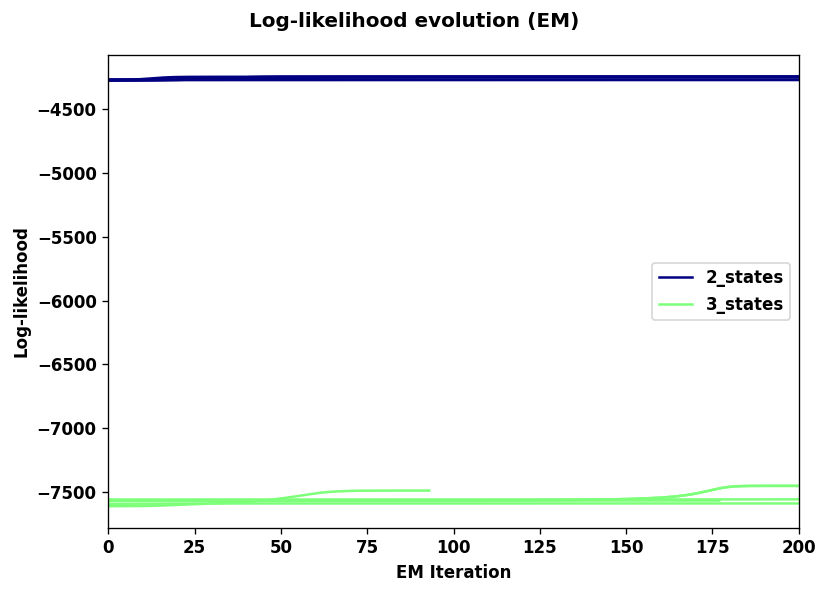

In [77]:
log_like_evolution_per_states(path_analysis_dir, path_info_dir, dict_objects=0, dict_processed_objects=0,
                              dictionary_information=0)

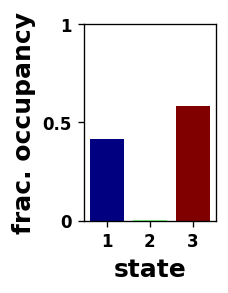

In [78]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=dict_param,
                             states_occupancies=states_occupancies)

probabilities non exponent are [[-0.02825994 -3.58040657]
 [-4.01481063 -0.01821119]]


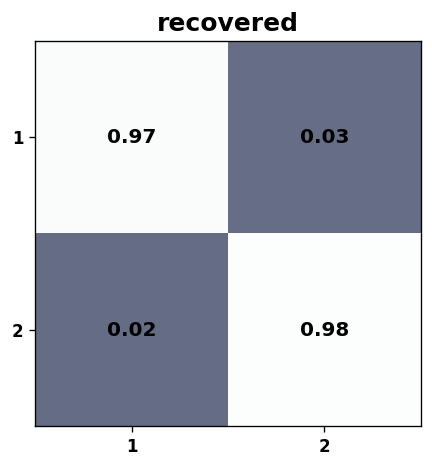

In [79]:
transition_prob_matrix(path_analysis_dir, path_info_dir, glmhmms_ista=glmhmms_ista, dict_param=dict_param)

inferred and transformed weights are {'2_states': [array([[[0.50073052, 0.97605726]],

       [[0.50499852, 0.99593096]]]), array([[[0.50017594, 0.97660973]],

       [[0.49936342, 0.99653308]]]), array([[[0.49914307, 0.98935123]],

       [[0.49741345, 0.98934179]]]), array([[[0.49765554, 0.99787526]],

       [[0.50121714, 0.98024724]]]), array([[[0.50218376, 0.99884863]],

       [[0.50054488, 0.97915954]]])], '3_states': [array([[[0.4975382 , 0.98749401]],

       [[0.49936797, 0.97497487]]]), array([[[0.49931508, 0.9783592 ]],

       [[0.50079446, 0.98000402]]]), array([[[0.49954137, 0.9781207 ]],

       [[0.49949434, 0.97871368]]]), array([[[0.49904041, 0.97109215]],

       [[0.50813889, 0.99926282]]]), array([[[0.49748379, 0.99917634]],

       [[0.50032132, 0.97303085]]])]}


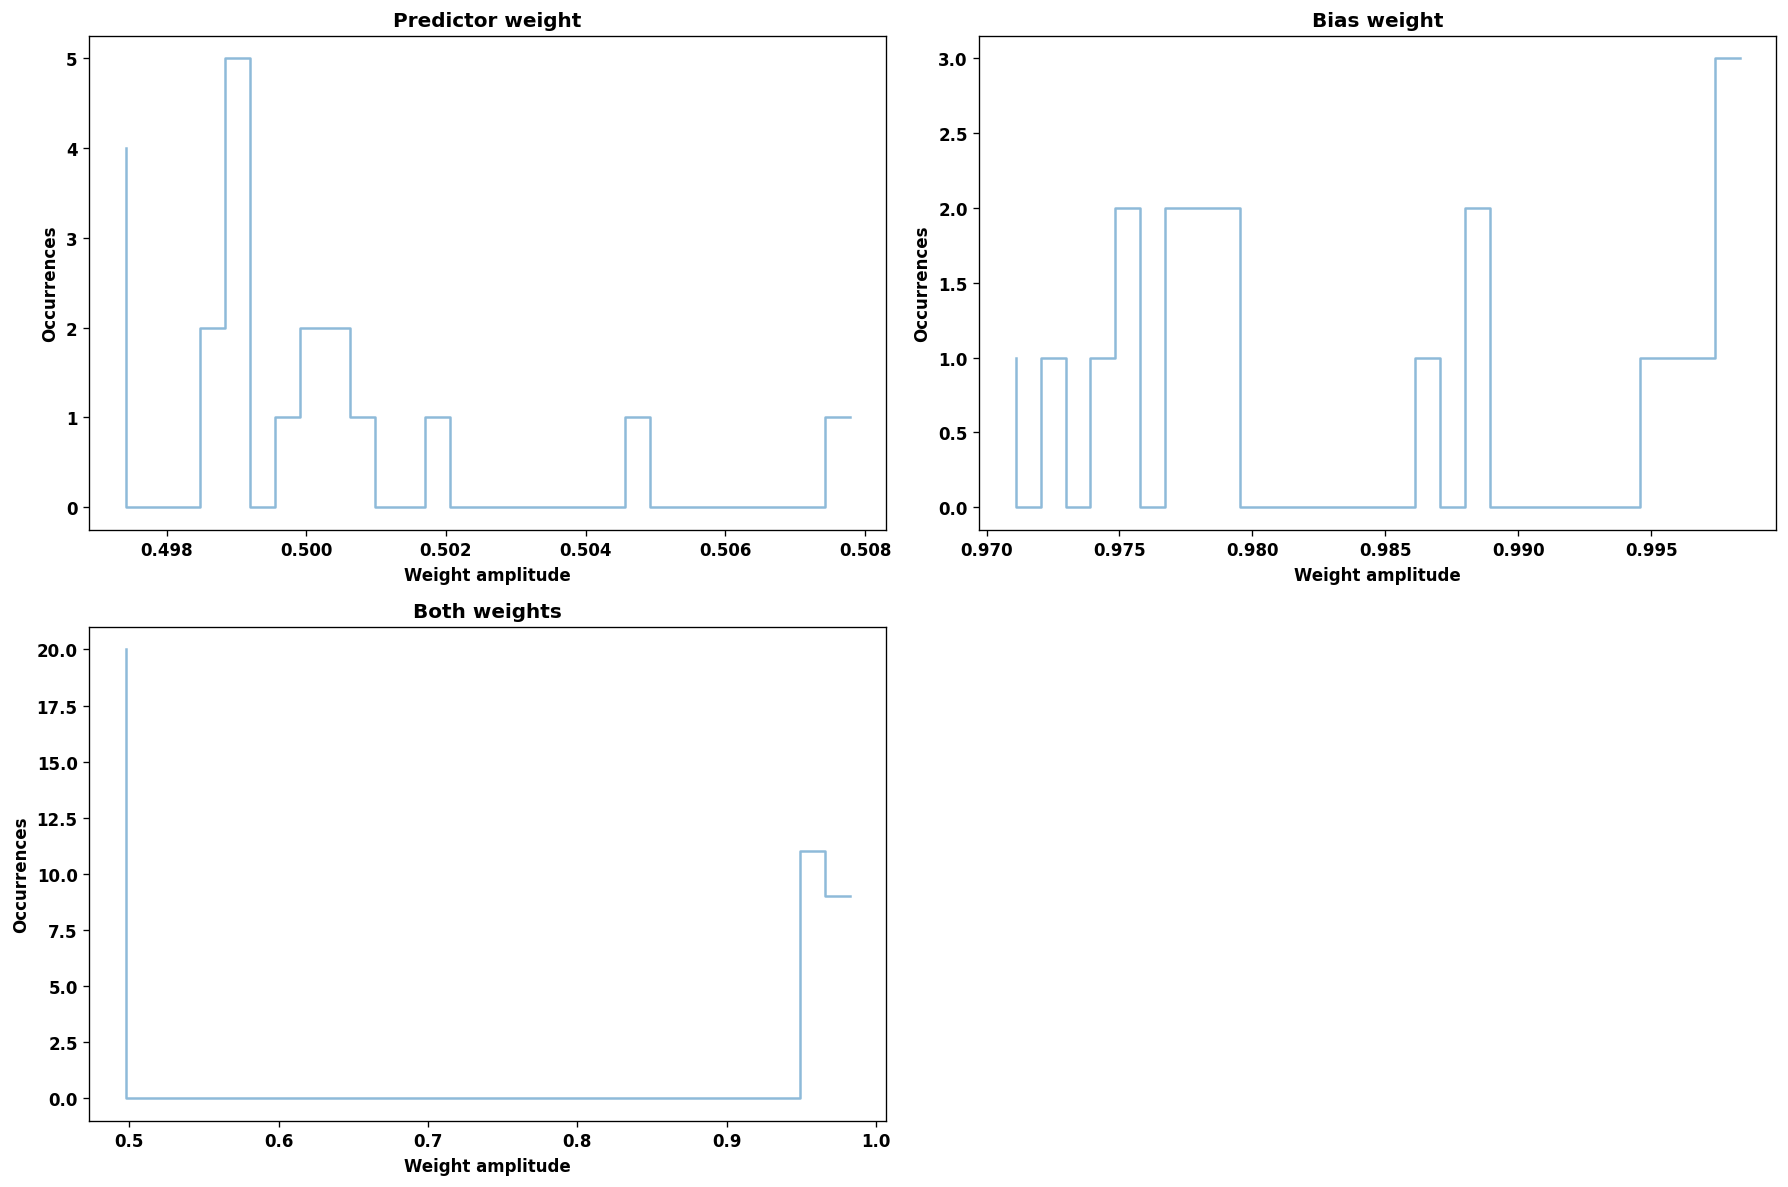

In [80]:
weights_distribution_histogram(path_analysis_dir, path_info_dir)

B Speeds_1st_der
max value is 450.44788058672543
[-0.05020154 -0.05992229 -0.06960526 ... -0.0171986  -0.01420694
 -0.01064292]


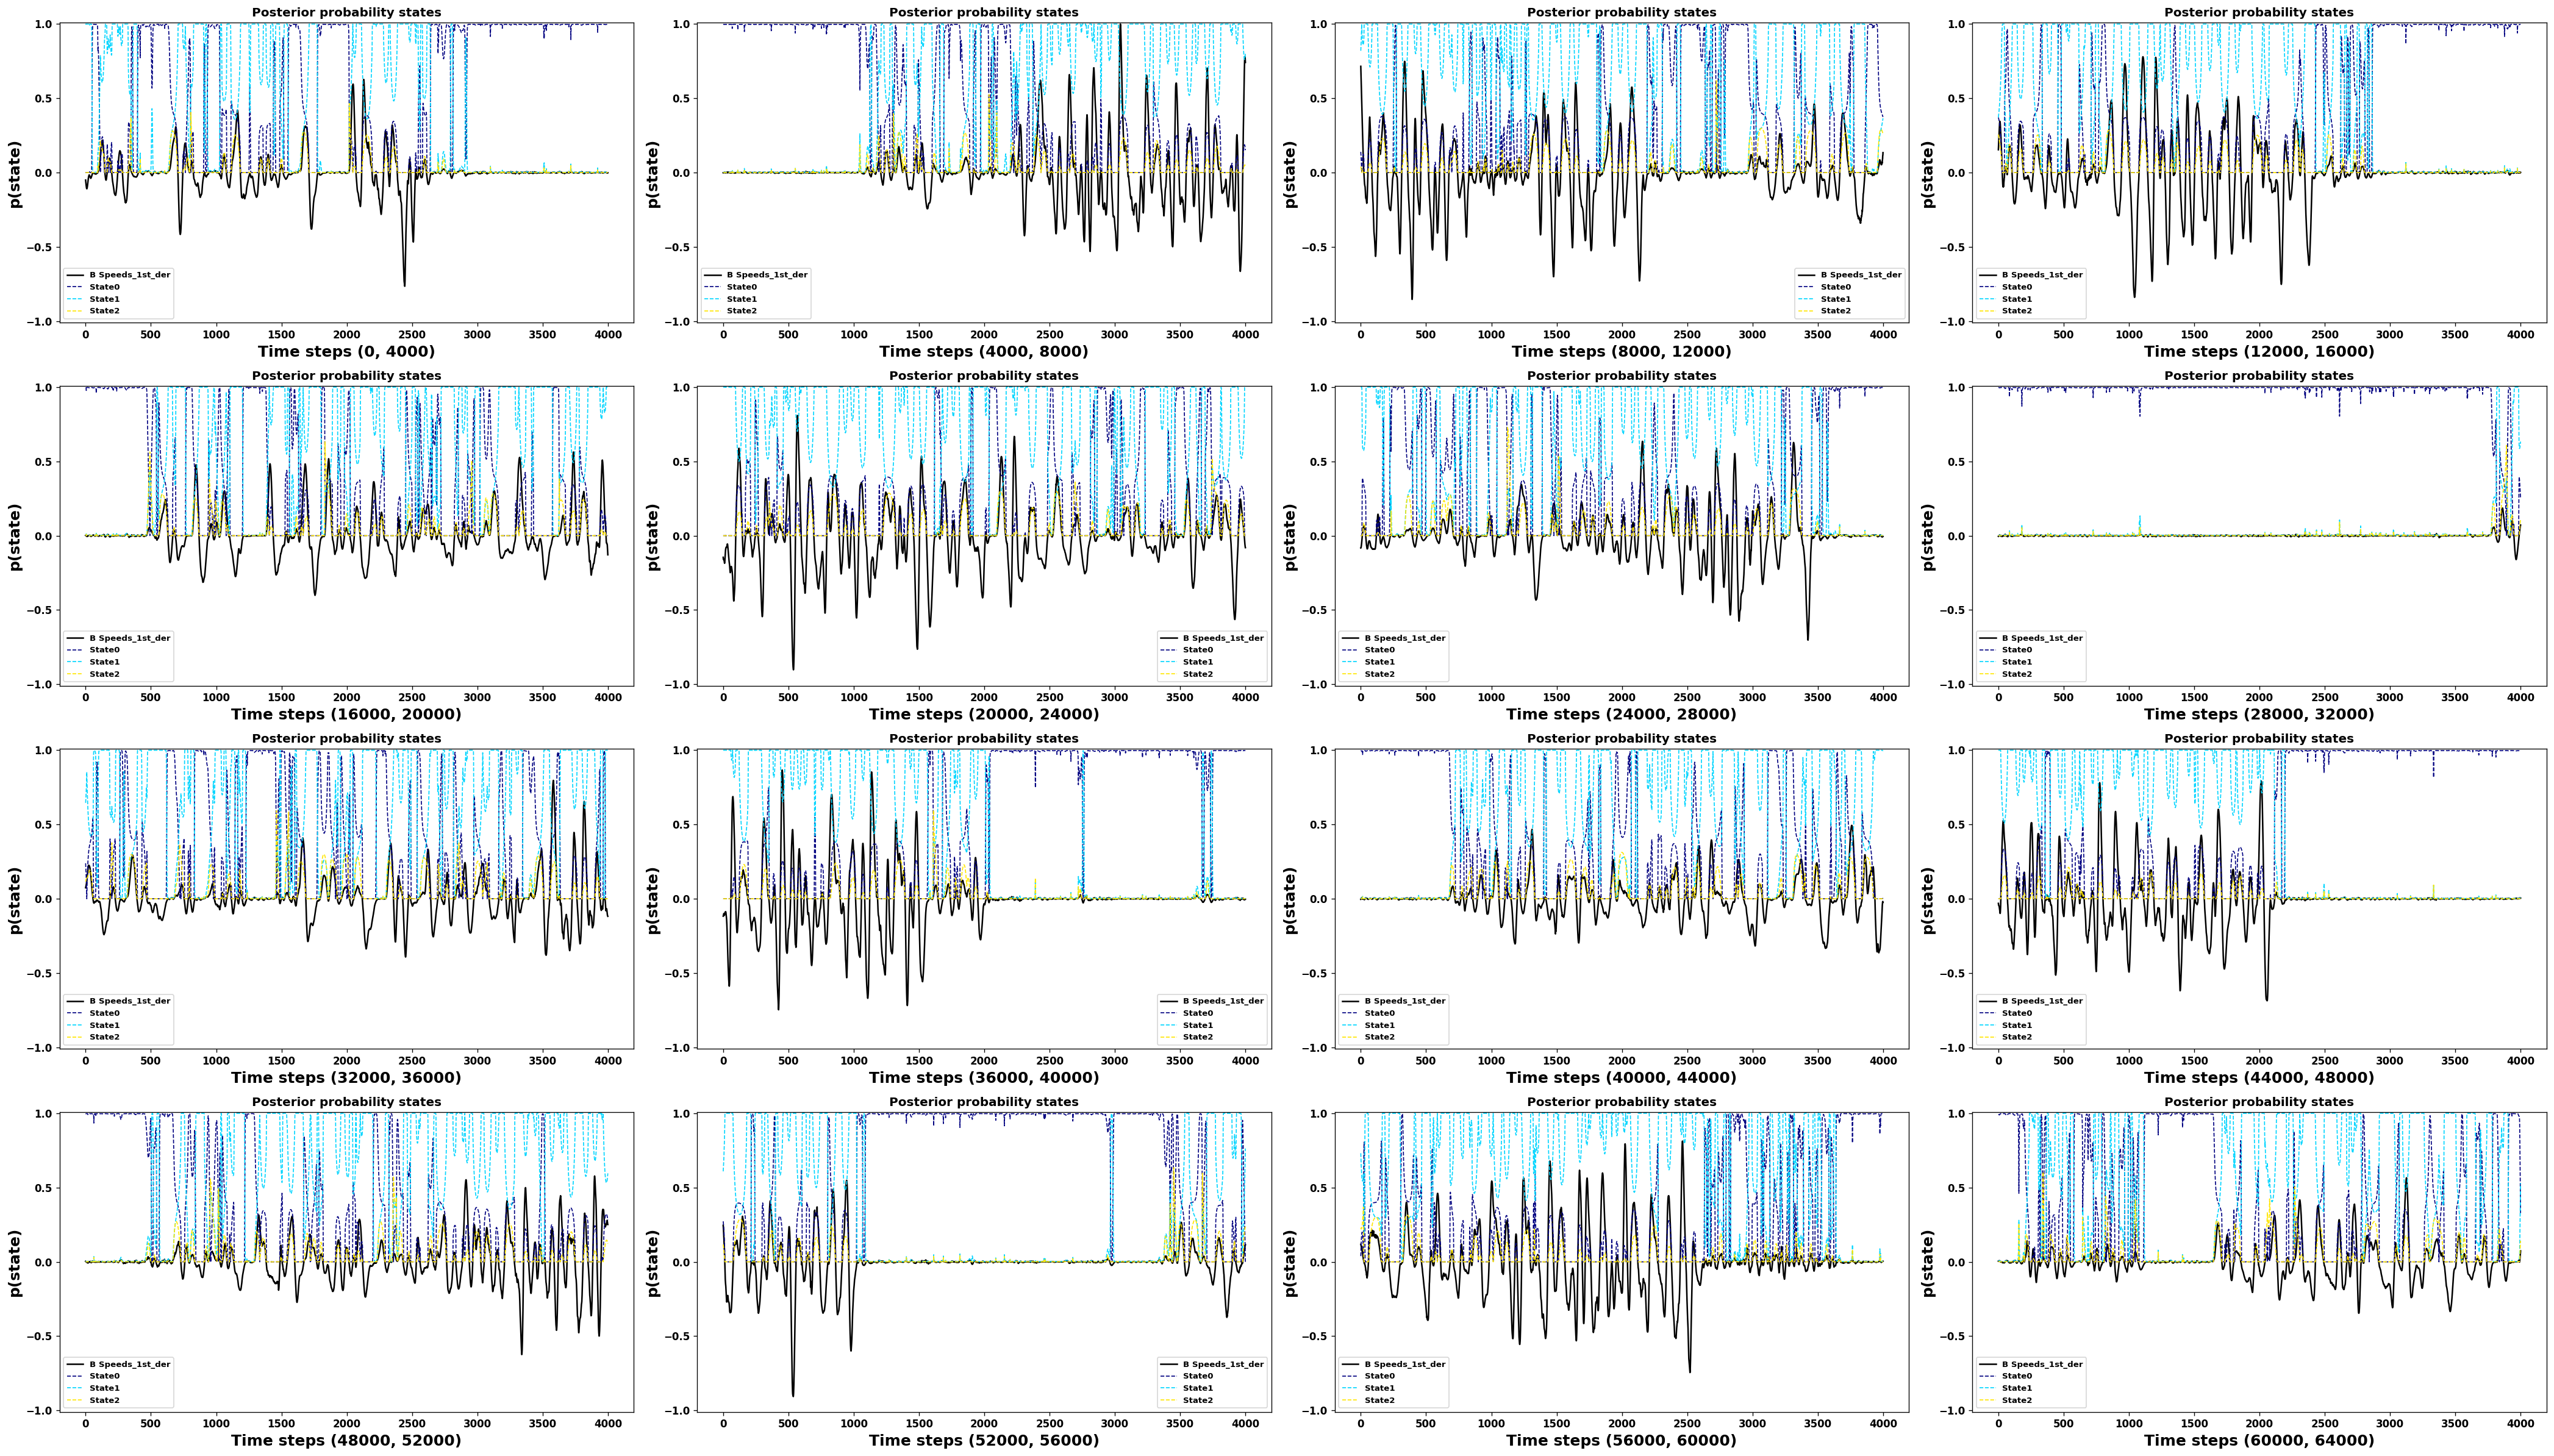

In [86]:
posterior_prob_per_states_with_predictor(path_analysis_dir, path_info_dir, data_continous_ratemaps, posterior_probs_list=posterior_probs_list,
                                             tot_masked_indices_list=tot_masked_indices_list, T_list=T_list,
                                             pred_index=1)